In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
plt.figure(figsize=(20,20))


# Read image from path
# path = 'parda.jpg' 
path = '239056.jpg' 
# path = 'fruit-bowl.jpg' 
# path = 'kid.jpg' 
img = cv2.imread(path)

<Figure size 1440x1440 with 0 Axes>

# Just trying Canny Edge detection

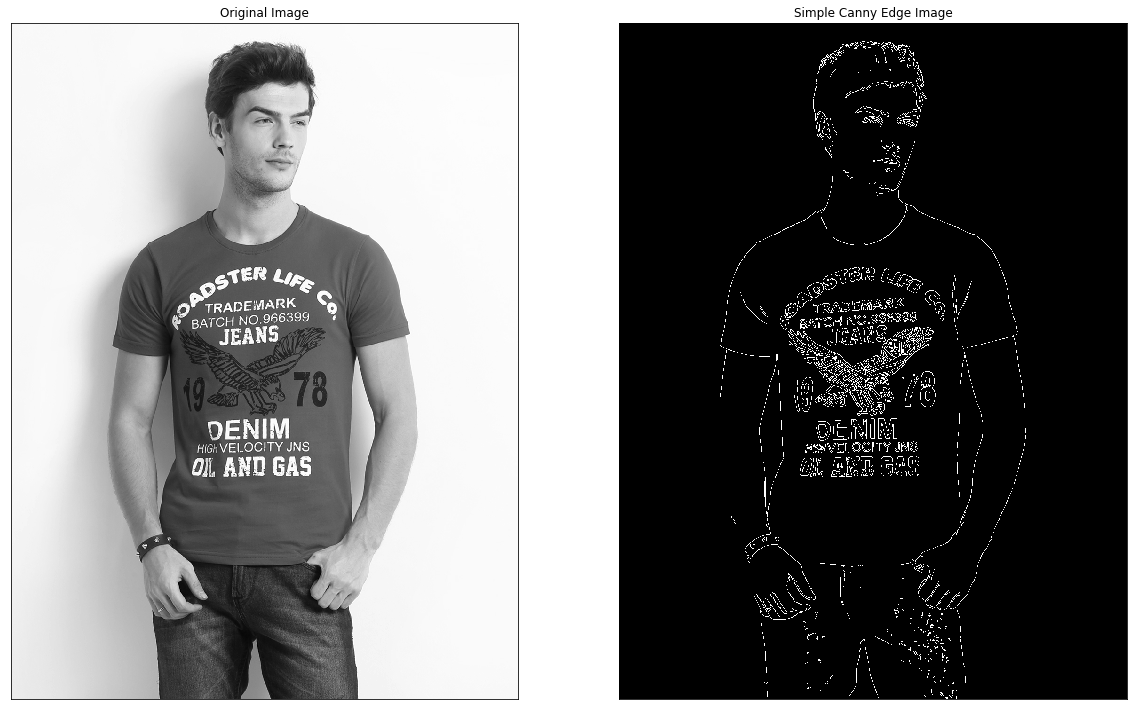

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(20,20))
img = cv2.imread(path,0).astype(np.uint8)

edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Simple Canny Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

# Optimized pipeline for removing noise and filtering better contours
1. Convert an image to gray scale.
2. Perform gaussian blur on it.
3. Pass it through sobel filter.
4. Pass it through canny edge detector.

(<matplotlib.axes._subplots.AxesSubplot at 0x11c0c8be0>,
 (-0.5, 1079.5, 1439.5, -0.5),
 Text(0.5,1,'Enhanced Operated Image'))

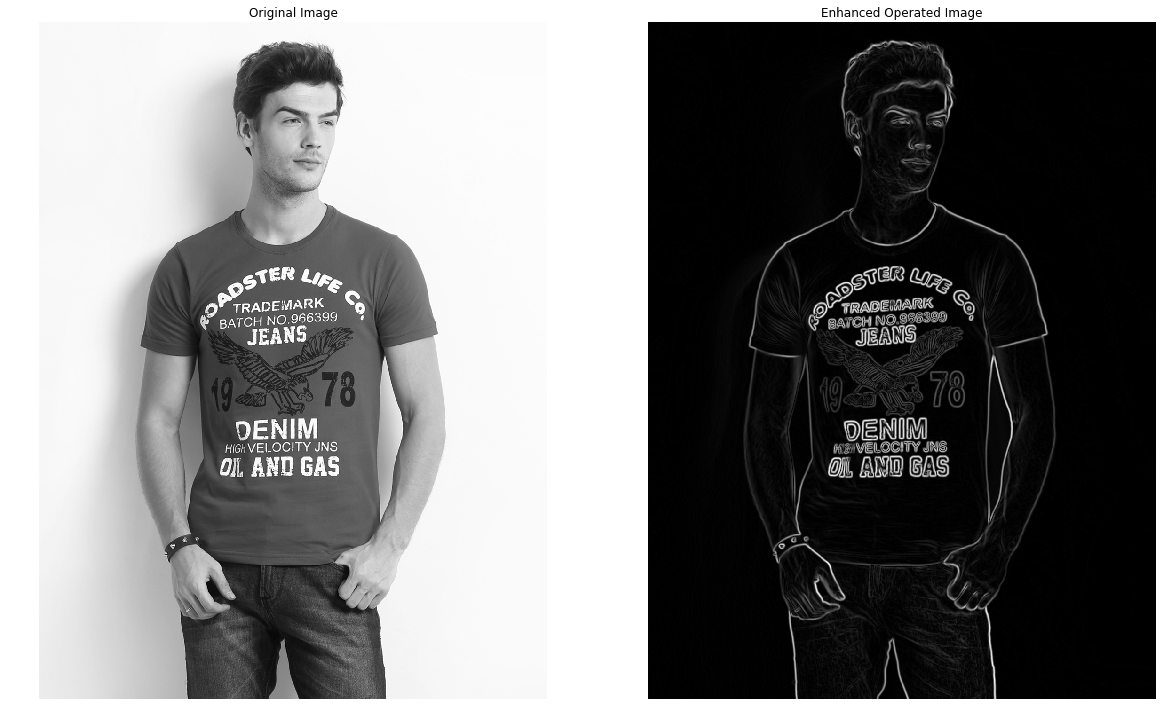

In [3]:
plt.figure(figsize=(20,20))
# Convert it to gray scale
img_gray_mode = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.subplot(121),plt.imshow(img_gray_mode, cmap='gray'),plt.axis('off'),plt.title('Original Image')

# Do a gaussian blur using 7*7 filter
img_gaussian = cv2.GaussianBlur(img_gray_mode,(7,7),0)
# plt.subplot(132),plt.imshow(img_gaussian, cmap='gray'),plt.axis('off')


# Find the sobel values
import scipy
from scipy import ndimage

img_gaussian = img_gaussian.astype('int32')
dx = ndimage.sobel(img_gaussian, 1)  # horizontal derivative
dy = ndimage.sobel(img_gaussian, 0)  # vertical derivative
mag = np.hypot(dx, dy)  # magnitude
mag *= 255.0 / np.max(mag)  # normalize (Q&D)

# Get the canny edge values
mag_copy = np.uint8(mag)

plt.subplot(122),plt.imshow(mag_copy, cmap='gray'),plt.axis('off'),plt.title('Enhanced Operated Image')

In [4]:
# plt.figure(figsize=(10,10))
# slicecanny = cv2.Canny(mag_copy,1,100)
# plt.imshow(slicecanny, cmap='gray'),plt.axis('off'),plt.title('Enhanced Canny Image')